# 2021S AML-3104 Assignment 1
### [30 Marks, 20%]

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import seaborn as sns
# You may need some sklearn specific imports, or other standard toolboxes
# !pip install fer

## Load dataset

In [2]:
trainingset = np.loadtxt('training.csv', delimiter=',')
testingset = np.loadtxt('test.csv', delimiter=',')

trainingset

array([[ 70.,  80.,  82., ...,   0.,   0.,   0.],
       [151., 150., 147., ...,   0.,   0.,   0.],
       [231., 212., 156., ...,   0.,   0.,   0.],
       ...,
       [ 74.,  81.,  87., ...,   1.,   0.,   0.],
       [222., 227., 203., ...,   0.,   0.,   0.],
       [195., 199., 205., ...,   1.,   0.,   0.]])

## Split data

In [3]:
n_inputs = 2304 # images are 48 x 48
n_classes = 7 # 7 classes - as defined below
img_dim = 48 # each input image dimension, width and height are both 48

x_training = trainingset[:, 0:n_inputs] # Extract the first 2304 elements - the image
y_training = trainingset[:, n_inputs:n_inputs + n_classes] # Extract the last 7 elements - a one hot category encoding

x_testing = testingset[:, 0:n_inputs] # Extract the first 2304 elements - the image
y_testing = testingset[:, n_inputs:n_inputs + n_classes] # Extract the last 7 elements - a one hot category encoding

x_training = x_training.reshape(x_training.shape[0], 48, 48) # Make samples image shaped
x_testing = x_testing.reshape(x_testing.shape[0], 48, 48) # Make samples image shaped

In [4]:
x_training.shape

(28709, 48, 48)

In [5]:
x_testing.shape

(3589, 48, 48)

In [6]:
# Reshaping the Samples
x_training = x_training.reshape(x_training.shape[0], 48, 48) # Make samples image shaped
x_testing = x_testing.reshape(x_testing.shape[0], 48, 48) # Make samples image shaped

In [7]:
x_training.shape

(28709, 48, 48)

In [8]:
x_testing.shape

(3589, 48, 48)

In [9]:
def get_emotion(whichemotion):
    if whichemotion.shape[0] == 1:
        indx = whichemotion[0]
    else:
        indx = np.argmax(whichemotion)
    if indx == 0:
        return 'angry'
    elif indx == 1:
        return 'disgust'
    elif indx == 2:
        return 'fear'
    elif indx == 3:
        return 'happy'
    elif indx == 4:
        return 'sad'
    elif indx == 5:
        return 'surprise'
    elif indx == 6:
        return 'neutral'

(28709, 48, 48)
(28709, 7)
(3589, 48, 48)
(3589, 7)


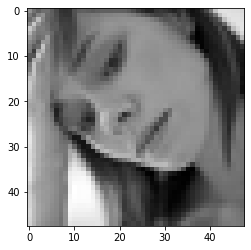

facial emotion: fear


In [10]:
print(x_training.shape)
print(y_training.shape)

print(x_testing.shape)
print(y_testing.shape)

sampleindex = np.random.randint(0,1000)
sample = x_training[sampleindex, :]
sample = sample.reshape(48, 48)

plt.imshow(sample, cmap='gray')
plt.show()
print('facial emotion: %s' % get_emotion(y_training[sampleindex, :]))

# Part I : Happy or Sad

## For this part you will consider a binary classification problem - categorizing faces as happy or sad

[1 Mark] a. Sample from the data loaded above to include only the happy or sad cases

In [11]:
# YOUR CODE HERE
# Sample from the data loaded above to include only the happy or sad cases

data_train_org = pd.read_csv('training.csv',sep=',',header=None)
data_test_org = pd.read_csv('test.csv', sep=',',header=None)

In [12]:
data_test_org

,0,1,2,3,4,5,6,7,8,9,...,2301,2302,2303,2304,2305,2306,2307,2308,2309,2310
0,254,254,254,254,254,249,255,160,2,58,...,42,129,180,1,0,0,0,0,0,0
1,156,184,198,202,204,207,210,212,213,214,...,172,167,161,0,1,0,0,0,0,0
2,69,118,61,60,96,121,103,87,103,88,...,88,87,90,0,0,0,0,1,0,0
3,205,203,236,157,83,158,120,116,94,86,...,43,82,86,0,0,0,0,0,0,1
4,87,79,74,66,74,96,77,80,80,84,...,41,34,32,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3584,178,176,172,173,173,174,176,173,166,166,...,14,15,19,0,0,0,0,1,0,0
3585,25,34,42,44,42,47,57,59,59,58,...,9,12,11,0,0,0,1,0,0,0
3586,255,255,255,255,255,255,255,255,255,255,...,48,50,46,0,0,0,0,1,0,0
3587,33,25,31,36,36,42,69,103,132,163,...,4,5,4,0,0,0,0,1,0,0


In [13]:
# Selecting the columns which has values for happy or sad faces
data_train=data_train_org.loc[(data_train_org[2307]==1)|(data_train_org[2308]==1)]
data_test = data_test_org.loc[(data_test_org[2307]==1)|(data_test_org[2308]==1)]

In [14]:
data_test

,0,1,2,3,4,5,6,7,8,9,...,2301,2302,2303,2304,2305,2306,2307,2308,2309,2310
2,69,118,61,60,96,121,103,87,103,88,...,88,87,90,0,0,0,0,1,0,0
4,87,79,74,66,74,96,77,80,80,84,...,41,34,32,0,0,0,1,0,0,0
5,235,233,223,109,34,37,34,31,28,38,...,33,17,19,0,0,0,1,0,0,0
10,180,175,169,161,157,158,157,154,155,157,...,32,32,33,0,0,0,1,0,0,0
12,121,112,64,104,101,87,118,74,91,128,...,81,83,85,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3584,178,176,172,173,173,174,176,173,166,166,...,14,15,19,0,0,0,0,1,0,0
3585,25,34,42,44,42,47,57,59,59,58,...,9,12,11,0,0,0,1,0,0,0
3586,255,255,255,255,255,255,255,255,255,255,...,48,50,46,0,0,0,0,1,0,0
3587,33,25,31,36,36,42,69,103,132,163,...,4,5,4,0,0,0,0,1,0,0


In [15]:
# Dropping the unwanted columns for the faces
data_train = data_train.drop(data_train.columns[[2304,2305,2306,2309,2310]], axis=1) 
data_test = data_test.drop(data_test.columns[[2304,2305,2306,2309,2310]], axis=1) 

In [16]:
# Renaming the column names
data_train=data_train.rename(columns={2307:2304,2308:2305})
data_test=data_test.rename(columns={2307:2304,2308:2305})

In [17]:
data_train

,0,1,2,3,4,5,6,7,8,9,...,2296,2297,2298,2299,2300,2301,2302,2303,2304,2305
3,24,32,36,30,32,23,19,20,30,41,...,132,132,133,136,139,142,143,142,0,1
6,20,17,19,21,25,38,42,42,46,54,...,68,91,85,93,97,99,107,118,0,1
7,77,78,79,79,78,75,60,55,47,48,...,139,150,179,180,175,125,67,68,1,0
8,85,84,90,121,101,102,133,153,153,169,...,111,106,102,99,89,58,73,84,1,0
14,4,2,13,41,56,62,67,87,95,62,...,80,74,69,99,28,3,7,12,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28697,181,172,161,144,116,109,70,109,187,131,...,146,143,138,133,128,125,124,123,1,0
28698,35,45,69,79,75,48,45,35,56,93,...,193,227,246,246,242,242,242,239,1,0
28700,11,10,12,13,9,11,10,11,11,10,...,12,9,10,10,13,12,14,16,0,1
28706,74,81,87,89,95,100,98,93,105,120,...,211,209,200,195,192,188,187,187,0,1


In [18]:
n_inputs = 2304 # images are 48 x 48
n_classes =  2# classes - as defined below
img_dim = 48 # each input image dimension, width and height are both 48

x_training_data = data_train.iloc[:, 0:n_inputs] # Extract the first 2304 elements - the image
y_training_data = data_train.iloc[:, n_inputs:n_inputs + n_classes] # Extract the last 7 elements - a one hot category encoding

x_testing_data = data_test.iloc[:, 0:n_inputs] # Extract the first 2304 elements - the image
y_testing_data = data_test.iloc[:, n_inputs:n_inputs + n_classes] # Extract the last 7 elements - a one hot category encoding

In [19]:
y_training_data=y_training_data.drop(data_train.columns[[2305]], axis=1)

In [20]:
y_testing_data=y_testing_data.drop(data_test.columns[[2305]], axis=1)

In [21]:
# 0 - sad, 1 - Happy
y_testing_data

,2304
2,0
4,1
5,1
10,1
12,0
...,...
3584,0
3585,1
3586,0
3587,0


In [22]:
y_training_data

,2304
3,0
6,0
7,1
8,1
14,1
...,...
28697,1
28698,1
28700,0
28706,0


In [23]:
print('Train X:',x_training_data.shape, 'Train Y:', y_training_data.shape)
print('\nTest X:',x_testing_data.shape, 'Test Y:', y_testing_data.shape)

Train X: (12045, 2304) Train Y: (12045, 1)

Test X: (1548, 2304) Test Y: (1548, 1)


In [24]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_training_data)
X_test = sc.transform(x_testing_data)

[4 Marks] b. Apply PCA and LDA to represent the faces, display a sample of a few faces for each case. You may consider using one or both of these in the steps that follow if they are of any value (this is for you to decide).

#### PCA

In [25]:
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

In [26]:
pca = PCA(n_components = 0.99)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [27]:
print('X Train PCA:',X_train_pca.shape, '\nX Test PCA:',X_test_pca.shape)

X Train PCA: (12045, 848) 
X Test PCA: (1548, 848)


#### LDA

In [28]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda=LinearDiscriminantAnalysis()
X_train_lda = lda.fit_transform(X_train, y_training_data)
X_test_lda = lda.transform(X_test)

C:\Users\harsh\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [29]:
print('X Train LDA:',X_train_lda.shape, '\nX Test LDA:',X_test_lda.shape)

X Train LDA: (12045, 1) 
X Test LDA: (1548, 1)


In [30]:
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, roc_curve, auc, roc_auc_score

model_score = [[]]

# To get all the result of all model's accuracy, using RMSE, MSE
def results(x_test, y_train, y_pred, y_test, model, model_name):

    #Calculating MSE and RMSE
    mse_score = mean_squared_error(y_test,y_pred)
    rmse_score = np.sqrt(mean_squared_error(y_test,y_pred))

    #Testing Score
    test_score = model.score(x_test, y_test)*100

    print("Accuracy score for Test-Set Data:", round(test_score, 3))

    return [model_name, round(mse_score,3), round(rmse_score,3), round(test_score,3)]
  

[2 Marks] c. Apply naive Bayes to classify faces as happy or sad. Report your accuracy.

#### Without Performing Dimensionality Reduction

In [31]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_training_data);

y_pred_nb = gnb.predict(X_test)

#results(X_test, y_test, y_pred_nb, 'GaussianNB')
model_score[0] = results(X_test, y_training_data, y_pred_nb, y_testing_data, gnb, 'Naive Bayes')

C:\Users\harsh\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Accuracy score for Test-Set Data: 59.044


#### PCA

In [32]:
gnb_pca = GaussianNB()
gnb_pca.fit(X_train_pca, y_training_data);

y_pred_nb_pca = gnb_pca.predict(X_test_pca)

model_score.append(results(X_test_pca,y_training_data, y_pred_nb_pca, y_testing_data, gnb_pca, 'Naive Bayes - PCA'))

C:\Users\harsh\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Accuracy score for Test-Set Data: 55.426


#### LDA

In [33]:
gnb_pca = GaussianNB()
gnb_pca.fit(X_train_lda, y_training_data);

y_pred_nb_lda = gnb_pca.predict(X_test_lda)

model_score.append(results(X_test_lda,y_training_data, y_pred_nb_lda, y_testing_data, gnb_pca, 'Naive Bayes - LDA'))

Accuracy score for Test-Set Data: 67.506


C:\Users\harsh\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[2 Marks] d. Apply Logistic regression to classify faces as happy or sad. Report the accuracy.

####  Without Performing Dimensionality Reduction

In [34]:
from sklearn.linear_model import LogisticRegression

lreg_all = LogisticRegression(solver='saga', max_iter=100)
lreg_all.fit(X_train, y_training_data)

y_pred_lr = lreg_all.predict(X_test)

model_score.append(results(X_test,y_training_data,y_pred_lr, y_testing_data, lreg_all, 'Logistic Regression'))

C:\Users\harsh\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Accuracy score for Test-Set Data: 70.22


C:\Users\harsh\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


#### PCA

In [35]:
lreg_all_pca = LogisticRegression(solver='saga', max_iter=100)
lreg_all_pca.fit(X_train_pca, y_training_data)

y_pred_lr_pca = lreg_all_pca.predict(X_test_pca)

model_score.append(results(X_test_pca,y_training_data,y_pred_lr_pca, y_testing_data, lreg_all_pca, 'Logistic Regression - PCA'))

C:\Users\harsh\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Accuracy score for Test-Set Data: 71.059


C:\Users\harsh\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


#### LDA

In [36]:
lreg_all_pca = LogisticRegression(solver='saga',max_iter = 100)
lreg_all_pca.fit(X_train_lda, y_training_data);

y_pred_nb_lda = lreg_all_pca.predict(X_test_lda)

model_score.append(results(X_test_lda,y_training_data, y_pred_nb_lda, y_testing_data, lreg_all_pca, 'Logistic Regression - LDA'))

Accuracy score for Test-Set Data: 67.313


C:\Users\harsh\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[2 Marks] e. Apply a Support Vector Machine to classify the faces as happy or sad. Choose parameters / arguments to try to maximize your accuracy. Report the accuracy.

In [37]:
from sklearn.preprocessing import MinMaxScaler

scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train)
X_train_svm = scaling.transform(X_train)
X_test_svm = scaling.transform(X_test)

pca = PCA(n_components = 0.99)
X_train_svm_pca = pca.fit_transform(X_train_svm)
X_test_svm_pca = pca.transform(X_test_svm)

lda = LinearDiscriminantAnalysis()
X_train_svm_lda = lda.fit_transform(X_train_svm ,y_training_data)
X_test_svm_lda = lda.transform(X_test_svm)

C:\Users\harsh\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [38]:
y_training_df=pd.DataFrame(y_training_data, columns=['label']).reset_index()
y_testing_df=pd.DataFrame(y_testing_data, columns=['label']).reset_index()

#### Linear Kernel

#### Without Performing Dimensionality Reduction

In [39]:
# from sklearn.svm import SVC

# svclassifier = SVC(kernel='linear')
# svclassifier.fit(X_train_svm, y_training_df['label']).all()

# y_pred_lk = svclassifier.predict(X_test_svm)

# model_score.append(results(X_test_svm,y_training_df['label'], y_pred_lk, y_testing_df['label'], svclassifier, 'SVC Linear Kernel'))

#### PCA

In [40]:
# svclassifier = SVC(kernel='linear')  
# svclassifier.fit(X_train_svm_pca, y_training_df['label']) 

# y_pred_lk = svclassifier.predict(X_test_svm_pca) 
# model_score.append(results(X_test_svm_pca,y_training_df['label'],y_pred_lk, y_testing_df['label'], svclassifier, 'SVC Linear Kernel - PCA'))

#### LDA

In [41]:
# svclassifier = SVC(kernel='linear')  
# svclassifier.fit(X_train_svm_lda, y_training);

# y_pred_nb_lda = svclassifier.predict(X_test_svm_lda)#X_test_dr)#

# Model_Compare.append(results(X_test_svm_lda,y_training, y_pred_nb_lda, y_testing, svclassifier, 'SVC Linear Kernel - LDA'))

[1 Mark] f. Which of the approaches above allow you to reliably determine the degree of happiness or sadness (i.e. how happy or how sad)? Which do you trust the most?

YOUR ANSWER HERE

[2 Marks] g. Based on your answer to f. show the 5 happiest faces and the 5 saddest faces.

In [42]:
# YOUR CODE HERE

# Part II : Multi-class

## For this part you will repeat the tasks in Part I, but instead consider the multi-class problem and classify inputs according to all 7 classes. 

[4 Marks] a. Apply PCA and LDA to represent the faces, display a sample of a few faces for each case. Produce a plot for PCA showing the cumulative variance captured by adding additional principal components (e.g. 1st PC, 1st + 2nd PC, etc.). On the same figure, plot the same curve for only happy and sad faces used in part 1.

In [43]:
# Taking all the dataset, for multi-class problems
X_train = np.array([features_2d.flatten() for features_2d in x_training])
X_test = np.array([features_2d.flatten() for features_2d in x_testing])
y_train = y_training
y_test = y_testing

In [44]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(28709, 2304)
(28709, 7)
(3589, 2304)
(3589, 7)


In [45]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### PCA

In [46]:
pca_2 = PCA(n_components = 0.99)
X_train_pca = pca_2.fit_transform(X_train)
X_test_pca = pca_2.transform(X_test)

print(' PCA Train DataSet=',X_train_pca.shape,'\n PCA Test DataSet=' ,X_test_pca.shape)

 PCA Train DataSet= (28709, 896) 
 PCA Test DataSet= (3589, 896)


#### LDA

In [47]:
y_train_1 = np.argmax(y_train, axis=1)

lda = LinearDiscriminantAnalysis()
X_train_lda = lda.fit_transform(X_train ,y_train_1)
X_test_lda = lda.transform(X_test)

print(' LDA Train DataSet=',X_train_lda.shape,'\n LDA Test DataSet=' ,X_test_lda.shape)

 LDA Train DataSet= (28709, 6) 
 LDA Test DataSet= (3589, 6)


#### Plotting Part 1 and Part 2 PCA

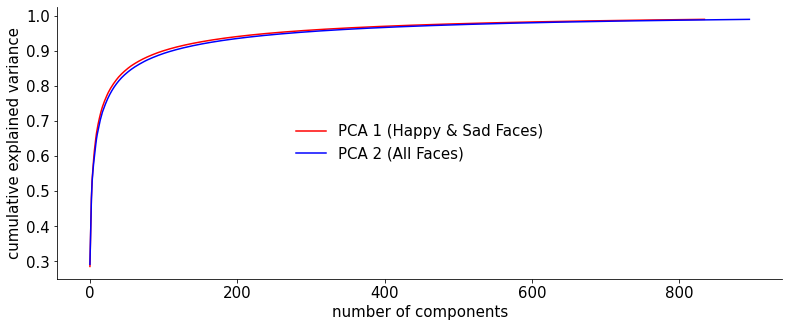

In [48]:
# For Part 1 PCA
exp_var1 = np.cumsum(pca.explained_variance_ratio_) 
# For Part 2 PCA
exp_var2 = np.cumsum(pca_2.explained_variance_ratio_)

plt.figure(figsize=(13,5))
plt.rcParams.update({'font.size': 15})

plt.plot(exp_var1, 'red', label='PCA 1 (Happy & Sad Faces)')
plt.plot(exp_var2, 'blue', label='PCA 2 (All Faces)')
for pos in ['right','top']:
    plt.gca().spines[pos].set_visible(False)
  
    plt.legend(framealpha=1, frameon=False, loc='center');

plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');


In [49]:
y_train = np.argmax(y_train, axis=1)
y_test = np.argmax(y_test, axis=1)

labels = [0, 1, 2, 3, 4, 5, 6]

In [50]:
model_score = [[]]

# To get all the result of all model's accuracy, using RMSE, MSE
def results(x_test, y_train, y_pred, y_test, model, model_name):

    #Calculating MSE and RMSE
    mse_score = mean_squared_error(y_test,y_pred)
    rmse_score = np.sqrt(mean_squared_error(y_test,y_pred))

    #Testing Score
    test_score = model.score(x_test, y_test)*100

    print("Accuracy score for Test-Set Data:", round(test_score, 3))

    return [model_name, round(mse_score,3), round(rmse_score,3), round(test_score,3)]

In [51]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

# Function to show Confusion Matrix
def cm_analysis(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perd = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    n_rows, n_cols = cm.shape
    for i in range(n_rows):
        for j in range(n_cols):
            c = cm[i, j]
            p = cm_perd[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=labels, columns=labels)
    cm.index.name = 'Actual Values'
    cm.columns.name = 'Predicted Values'
    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(cm, annot=annot, fmt='', ax=ax)
    plt.show()


[2 Marks] b. Classify the faces using Naive Bayes and report your accuracy.

#### Without Performing Dimensionality Reduction

In [53]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred_nb = gnb.predict(X_test)

model_score[0] = results(X_test, y_train, y_pred_nb, y_test, gnb, 'Naive Bayes')

Accuracy score for Test-Set Data: 22.736


#### PCA

In [54]:
gnb_pca = GaussianNB()
gnb_pca.fit(X_train_pca, y_train);

y_pred_nb_pca = gnb_pca.predict(X_test_pca)

model_score.append(results(X_test_pca,y_train, y_pred_nb_pca, y_test, gnb_pca, 'Naive Bayes (D-R)'))

Accuracy score for Test-Set Data: 16.383


#### LDA

In [55]:
gnb_lda = GaussianNB()
gnb_lda.fit(X_train_lda, y_train)

y_pred_nb_lda = gnb_lda.predict(X_test_lda)

model_score.append(results(X_test_lda,y_train, y_pred_nb_lda, y_test, gnb_lda, 'Naive Bayes LDA'))

Accuracy score for Test-Set Data: 35.163


Visualize the results of your classifier on the test set using a confusion matrix. Describe briefly how the multi-class nature of the problem is treated by the classifier.
DESCRIBE BRIEFLY HERE

Before Dimensionality Reduction


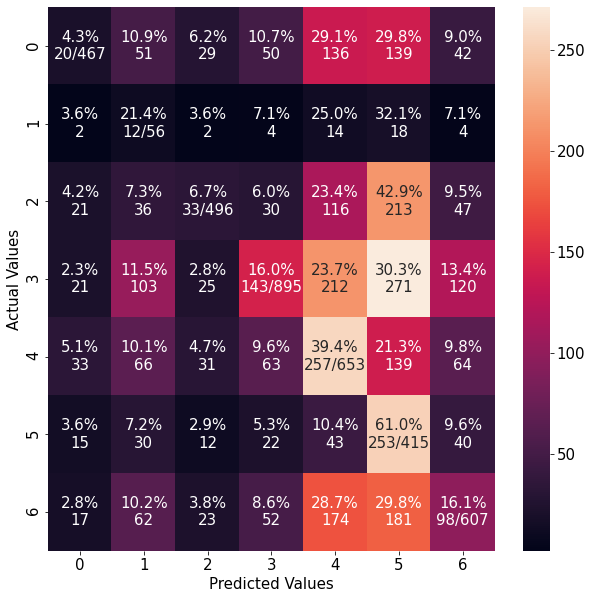


After Dimensionality Reduction


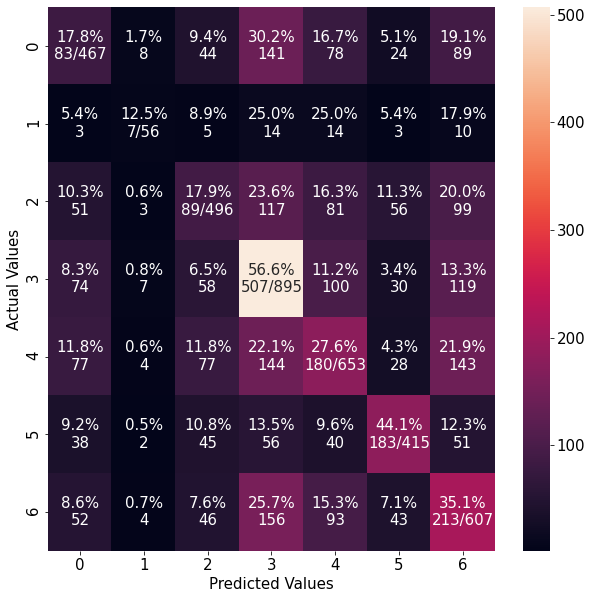

In [56]:
cf_matrix = confusion_matrix(y_test, y_pred_nb)
cf_matrix_lda = confusion_matrix(y_test, y_pred_nb_lda)

print("Before Dimensionality Reduction")
cm_analysis(y_test, y_pred_nb, labels)
print("\nAfter Dimensionality Reduction")
cm_analysis(y_test, y_pred_nb_lda, labels)

Comparing both classification, this model (Gaussian Naive Bayes) has not performed as aspected. Looking at the first confusion matrix which is before Dimensionality Reduction values at 4 & 5 (Sad & Surprise) Faces values are predicting high true positive values. In second confusion matrix, with LDA Dimensionality Reduction, 3 & 5 (Happy & Surprise) faces were predicted most true positive values.

[2 Marks] c. Classify the faces using logistic regression and report your accuracy.

#### Without Dimensionality Reduction

In [58]:
lreg_all = LogisticRegression(solver='saga', max_iter = 100)
lreg_all.fit(X_train, y_train)

y_pred_lr = lreg_all.predict(X_test)

model_score.append(results(X_test,y_train,y_pred_lr, y_test, lreg_all, 'Logistic Regression'))

Accuracy score for Test-Set Data: 35.247


C:\Users\harsh\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


#### PDA

In [59]:
lreg_all_pca = LogisticRegression(solver='saga', max_iter = 100)
lreg_all_pca.fit(X_train_pca, y_train)

y_pred_lr_pca = lreg_all_pca.predict(X_test_pca)

model_score.append(results(X_test_pca,y_train,y_pred_lr_pca, y_test, lreg_all_pca, 'Logistic Regression PCA'))

Accuracy score for Test-Set Data: 36.751


C:\Users\harsh\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


#### LDA

In [60]:
lreg_all_lda = LogisticRegression(solver='saga', max_iter = 100)
lreg_all_lda.fit(X_train_lda, y_train);

y_pred_nb_lda = gnb_lda.predict(X_test_lda)

model_score.append(results(X_test_lda,y_train, y_pred_nb_lda, y_test, lreg_all_lda, 'Logistic Regression LDA'))

Accuracy score for Test-Set Data: 34.634


Visualize the results of your classifier on the test set using a confusion matrix. Describe briefly how the multi-class nature of the problem is treated by the classifier.
DESCRIBE BRIEFLY HERE

Before Dimensionality Reduction


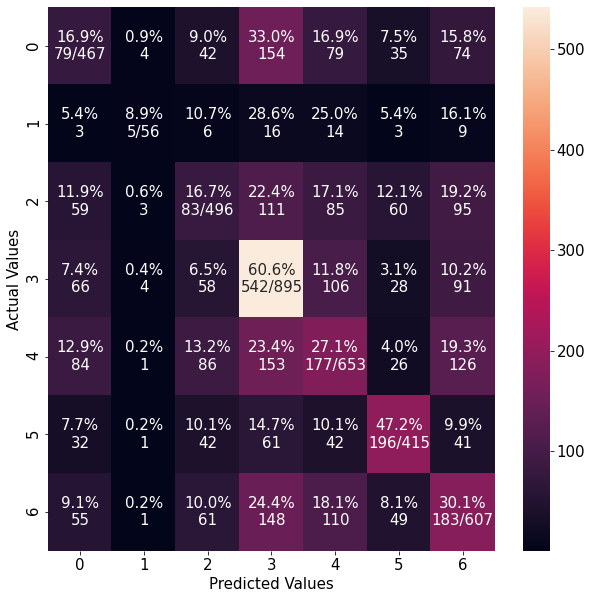

After Dimensionality Reduction


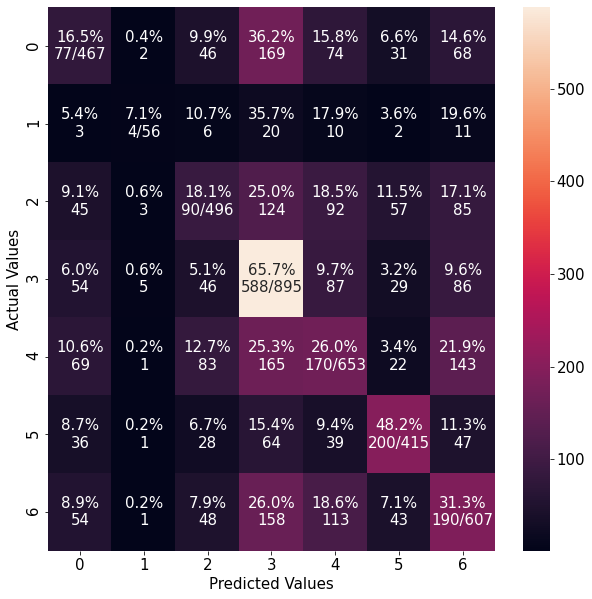

In [62]:
cf_matrix = confusion_matrix(y_test, y_pred_lr)
cf_matrix_pca = confusion_matrix(y_test, y_pred_lr_pca)

print("Before Dimensionality Reduction")
cm_analysis(y_test, y_pred_lr, labels)
print("After Dimensionality Reduction")
cm_analysis(y_test, y_pred_lr_pca, labels)

Comparing both the confusion matrix, as Logistic Regression has also not performed well on both the cases, First Confusion Matrix which is Without Performing Dimensionality Reduction, Happy - 3 & Surprise - 5 faces showing true positive values while second confusion matrix with dimensionality reduction also showing the same result. So, both the classification are not performing well.

[2 Marks] d. Classify the faces using a support vector machine and report your accuracy.

In [ ]:
# YOUR CODE HERE

Visualize the results of your classifier on the test set using a confusion matrix. Describe briefly how the multi-class nature of the problem is treated by the classifier.
DESCRIBE BRIEFLY HERE

[2 Marks] e. Which categories of faces seem to be most similar or least similar?
EXPLAIN HERE

[4 Marks] f. Let's assume that some of the faces were labeled wrong in producing the dataset. Propose and implement a solution that identifies images that are potentially mislabeled. Show 10 samples based on the method you choose.

#### Applying CNN Classifier

In [63]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D
from keras.utils import np_utils

In [65]:
from sklearn.metrics import accuracy_score

In [67]:
# Flattening the images from the 28x28 pixels to 1D 787 pixels
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [69]:
# normalizing the data to help with the training
X_train /= 255
X_test /= 255

In [70]:
# one-hot encoding using keras' numpy-related utilities
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (28709,)
Shape after one-hot encoding:  (28709, 10)


In [73]:
# building a linear stack of layers with the sequential model
model = Sequential()
# hidden layer
model.add(Dense(100, input_shape=(2304,), activation='relu'))
# output layer
model.add(Dense(10, activation='softmax'))

# looking at the model summary
model.summary()
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 100)               230500    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 231,510
Trainable params: 231,510
Non-trainable params: 0
_________________________________________________________________


In [75]:
# training the model for 10 epochs
model.fit(X_train, Y_train, batch_size=128, epochs=50, validation_data=(X_test, Y_test))

Epoch 1/50
225/225 [==============================] - 1s 5ms/step - loss: 1.5393 - accuracy: 0.4062 - val_loss: 1.5629 - val_accuracy: 0.4074
Epoch 2/50
225/225 [==============================] - 1s 5ms/step - loss: 1.5308 - accuracy: 0.4108 - val_loss: 1.5605 - val_accuracy: 0.4071
Epoch 3/50
225/225 [==============================] - 1s 5ms/step - loss: 1.5231 - accuracy: 0.4138 - val_loss: 1.5512 - val_accuracy: 0.4076
Epoch 4/50
225/225 [==============================] - 1s 5ms/step - loss: 1.5153 - accuracy: 0.4159 - val_loss: 1.5527 - val_accuracy: 0.4099
Epoch 5/50
225/225 [==============================] - 1s 5ms/step - loss: 1.5084 - accuracy: 0.4205 - val_loss: 1.5473 - val_accuracy: 0.4099
Epoch 6/50
225/225 [==============================] - 1s 5ms/step - loss: 1.5006 - accuracy: 0.4256 - val_loss: 1.5441 - val_accuracy: 0.4079
Epoch 7/50
225/225 [==============================] - 1s 5ms/step - loss: 1.4930 - accuracy: 0.4279 - val_loss: 1.5459 - val_accuracy: 0.4068
Epoch 

In [78]:
test_eval = model.evaluate(X_test,Y_test, verbose=1)

113/113 [==============================] - 0s 1ms/step - loss: 1.5346 - accuracy: 0.4202


In [80]:
print('Test loss:', test_eval[0]*100)
print('Test accuracy:', test_eval[1]*100)

Test loss: 153.4554123878479
Test accuracy: 42.01727509498596


# Optional

From all the classification approaches considered above, choose one to score faces based on a continuous valued prediction of for each of the categories.

[No Marks] a. Produce a prediction for each face in the test set (this has 7 dimensions). Visualize these based on a 2D embedding of the scores. The "data points" plotted in the embedding should show the actual picture of the face, at the corresponding 2D point location. (You could consider using t-SNE for your embedding)

In [ ]:
# YOUR CODE HERE